In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import math
import random as rd

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/My Drive/DLALS/a.txt',sep='\t',header=None)
df=df[150:250]
# df=np.array(df)
x=df[0]
y=df[1]
labels=df[2]

In [ ]:
classes = set(df[2])
print(classes)

{2, 4, 7}


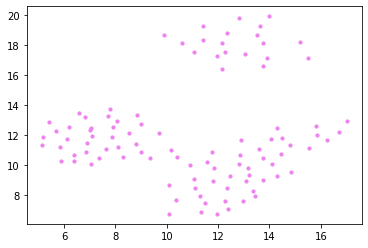

In [ ]:
plt.scatter(df[0],df[1],s=10,color='violet')

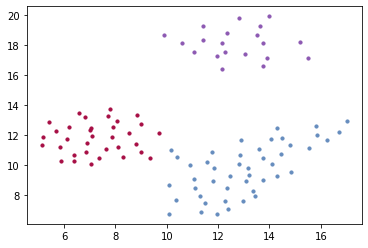

In [ ]:
# plot the data with true labels
colors = []
i = 0
for class_name in range(10):
  colors.append((rd.random(), rd.random(), rd.random()))
  plt.scatter(x[labels == class_name], y[labels == class_name], color = colors[i], s = 10)
  i += 1
plt.show()

APPLYING K-MEANS ON THE ABHOVE DATASET TO FROM INITIAL PARTITIONS AND CENTROIDS :

In [ ]:
# function which initializes centroids randomly
def init_centroids(df, k, n, f):
  max_values = df.max()
  min_values = df.min()
  centroids = np.random.rand(k, f) * np.full((k, f), np.array(max_values - min_values)) + np.full((k, f), np.array(min_values))
  return centroids

In [ ]:
# calculating distance between two data points A and B
def cal_distance(A, B):
  return math.sqrt(np.sum((A - B) ** 2))

In [ ]:
def my_kmeans(data, k, n, f, centroids, max_iterations = 10, plot_each_step = False, error = 0):
  # plot initial centroids which are selected randomly
  if plot_each_step:
    plt.title("Initial centroids")
    plt.scatter(data[:, 0], data[:, 1], s = 10)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="*", color = "red", s = 200)
    plt.show()
  clusters = np.zeros(n, dtype='int')
  for iter_no in range(max_iterations): # iterates for maximum number of iterations
    # assigning closest centeroid to each data point
    for i in range(n):
      clusters[i] = 0
      for cluster_no in range(k):
        temp_dist = cal_distance(data[i], centroids[cluster_no])
        if cluster_no == 0:
          dist = temp_dist
        if temp_dist < dist:
          dist = temp_dist
          clusters[i] = cluster_no # assign new cluster, if value of distance for new centroid is less than previous centroid
    
    # finding the new centroids by taking the mean value
    new_centroids = np.zeros((k, f))
    for cluster_no in range(k):
      points = np.array([data[i] for i in range(len(data)) if clusters[i] == cluster_no])
      new_centroids[cluster_no] = np.mean(points, axis = 0)
      if plot_each_step and len(points) > 0:
        plt.scatter(points[:, 0], points[:, 1], color = colors[cluster_no], s = 10)
    
    # calculating difference between previous centroids and new centroids
    diff = cal_distance(new_centroids, centroids)
    # print(centroids, new_centroids, diff)
    diff = round(diff, 2)
    # if there is no change in the previous centroids and new centroids then loop will terminated
    # scatter plot of each iteration
    if plot_each_step:
      plt.title("result after iteration " + str(iter_no))
      plt.scatter(new_centroids[:, 0], new_centroids[:, 1], marker = "*", s = 200, color = "red")
      plt.show()
    if diff <= error:
      break
    centroids = new_centroids
  return clusters + 1, centroids

In [ ]:
k = len(classes) # number of clusters
n, f = df.shape # n is total number of datapoints and f is total number of dimensions/features
f = f - 1
plot_each_step = False
max_iterations = 10
k, n, f

(3, 100, 2)

RUNNING FOR 50 ITERATIONS TO GET THE MOST GENERIC CENTROIDS AND PARTITIONS

initial centroids are selected as:
 [[16.82754774 18.91848571]
 [ 9.4373622  15.32359729]
 [13.27052358 13.18777614]
 [15.58944392 16.75341312]
 [13.98814324 15.01843934]
 [ 9.13641131 19.13556762]
 [14.68909985 15.43228461]
 [10.31204606 15.93117048]
 [ 6.14492127 15.06510673]
 [ 5.79416052 12.31899726]]


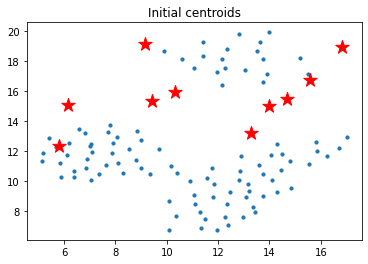

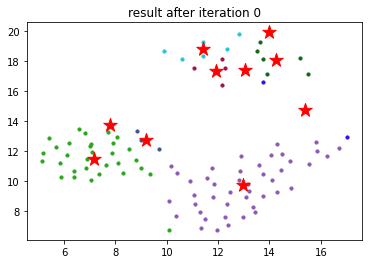

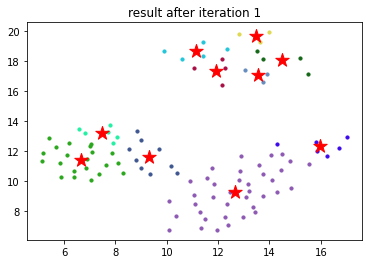

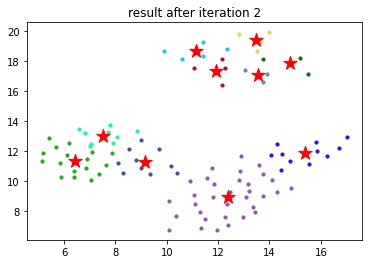

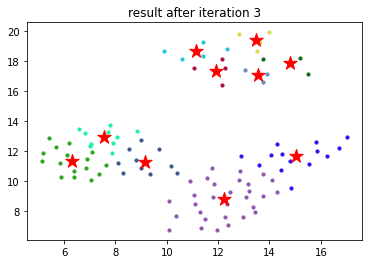

In [ ]:
# extract only features part of the data
k=10
df1 = df.iloc[:, :-1]
# covert the data into numpy array
data = np.array(df1)
data[:10]
initial_centroids = init_centroids(df1, k, n, f)
print("initial centroids are selected as:\n", initial_centroids)
# call my_kmeans function to get final clusters
clusters, centroids = my_kmeans(data, k, n, f, initial_centroids, max_iterations=10, error = 0.5, plot_each_step=True)

NOW WE HAVE CENTROIDS PARTITION POINTS WITH US : 

In [ ]:
clusters

array([ 6,  6,  6,  6,  6,  1,  8,  8,  8,  8,  5,  4,  1,  1,  1,  4,  4,
        5,  5,  8,  9,  9,  2,  2,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,
       10,  9,  9,  9,  2,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10,  2,  2,
        2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  7])

STEPS TO PLOT COMPLETE GRAPH WITHIN PARTITIONS

In [ ]:
mst=np.array(np.zeros((k,40)),dtype=int)
for i in range(3):
  z=0
  for j in range(100):
    if(i+1==clusters[j] and z<40):
      mst[i][z]=j
      z+=1
for i in range(3):
  for j in range(40):
    if(mst[i][j]==0):
      mst[i][j]=-1
mst[2][0]=0


In [ ]:
a=mst[0]
b=np.array(20)
for j in range(40):
  if(mst[1][j]!=-1):
    b=np.append(b,mst[1][j])
c=np.array(0)
for j in range(40):
  if(mst[2][j]!=-1):
    c=np.append(c,mst[2][j])
  
z=a
z1=b
z2=c
for i in range(1,40):
  a=np.append(a,a[i:40])
  b=np.append(b,b[i:40])
  c=np.append(c,c[i:40])
a=a[:]+150
b=b[:]+150
c=c[:]+150
z=z[:]+150
z1=z1[:]+150
z2=z2[:]+150

In [ ]:
current=z2[0]
for i in range(len(z2)):
  for j in range(len(z2)):
    # print(current,'-',z2[j],'c')
    c=np.append(c,np.array([current,z2[j]]))
  current=z2[i]
  #--
  current=z1[0]
for i in range(len(z1)):
  for j in range(len(z1)):
    # print(current,'-',z1[j],'b')
    b=np.append(b,np.array([current,z1[j]]))
  current=z1[i]
  #--
  current=z[0]
for i in range(len(z)):
  for j in range(len(z)):
    # print(current,'-',z[j],'a')
    a=np.append(a,np.array([current,z[j]]))
  current=z[i]

WILL BE PLOTTING COMPLETE GRAPHS LIKE THIS : 

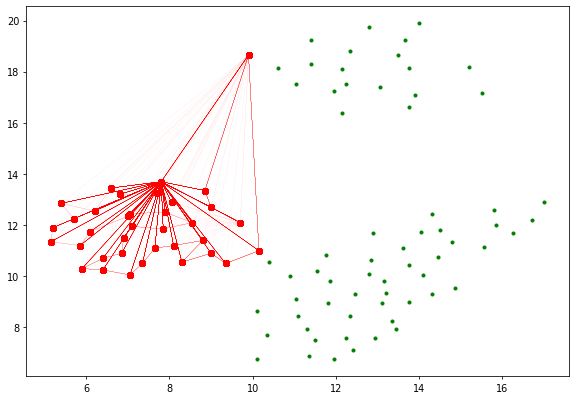

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 7), dpi=70, facecolor='w', edgecolor='k')
plt.scatter(x,y,s=10,color='green')
# plt.plot(x[a[:]],y[a[:]],'go--',lw=0.02)
# plt.plot(x[a[800:0]],y[a[800:0]],'go--')
plt.plot(x[c[:]],y[c[:]],'ro--',lw=0.02)
# plt.plot(x[b[:]],y[b[:]],'bo--',lw=0.02)

REMOVING COMMON POINTS BETWEEN PARTITIONS : 

In [ ]:
new_a=np.array(244)
for i in a:
  if(i not in b):
    new_a=np.append(new_a,i)
new_b=np.array(151)
for i in b:
  if(i not in c and i not in new_a):
    new_b=np.append(new_b,i)
new_c=np.array(150)
for i in c:
  if(i not in new_b and i not in a):
    new_c=np.append(new_c,i)

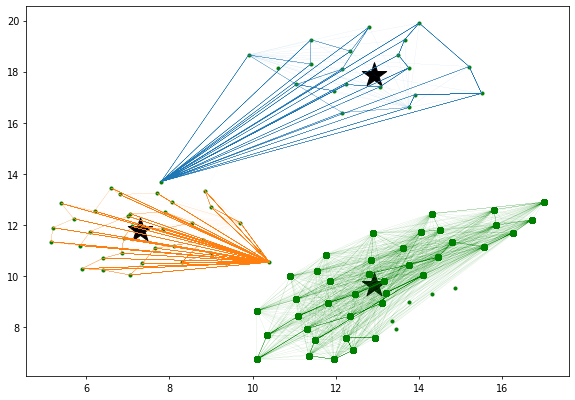

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 7), dpi=70, facecolor='w', edgecolor='k')
plt.scatter(x,y,s=10,color='green')
plt.plot(x[new_a[:]],y[new_a[:]],'go--',lw=0.02)
# plt.plot(x[a[800:0]],y[a[800:0]],'go--')
plt.plot(x[new_c[:]],y[new_c[:]],lw=0.02)
plt.plot(x[new_b[:]],y[new_b[:]],lw=0.02)
# plt.scatter(centroids[:, 0], centroids[:, 1], marker = "*", s = 700, color = "black")

COMPUTING INTER-PARTITION EDGES BASED ON CBR AND ADDING THEM IN THE GRAPH : 

In [ ]:
#WE HAVE CENTROIDS AS FOLLOWS : 
#which can be seen in the above graph : 
print(centroids)
#task : 
# Compute Dii, Dij,Djj and Dji as follows:
# Dii = d(xi,μi); Dij = d(xi,μj); Djj = d(xj,μj); Dji =d(xj,μi)
# If(Dij<2Dii) ||(Dji<2Djj)
# Compute d(xi,xj) and add this edge (xi,xj) to
# E.
def dist(a,b,c,d):
  return math.sqrt((a-c)**2+(b-d)**2)

[[12.91111111  9.66888889]
 [ 7.28235294 11.81029412]
 [12.91904762 17.8547619 ]]


In [ ]:
df=np.array(df)

In [ ]:
new_edge=np.array(None)
for i in range(len(centroids)):
  for j in range(100):
    dii=dist(centroids[clusters[j]-1][0],centroids[clusters[j]-1][1],df[j][0],df[j][1])
    for z in range(len(centroids)):
      if(i != z):
        dij=dist(centroids[z][0],centroids[z][1],df[j][0],df[j][1])
        if(dij<2*dii):
          new_edge=np.append(new_edge,[z,j])
      

In [ ]:
new_edge=new_edge[1:]

NOW WE HAVE NEW EDGES WITH US WHICH SOME WHAT LOOK LIKE THIS : 

In [ ]:
new_edge

array([2, 0, 2, 1, 2, 2, 2, 3, 2, 4, 2, 5, 2, 6, 2, 7, 2, 8, 2, 9, 2, 10,
       2, 11, 2, 12, 2, 13, 2, 14, 2, 15, 2, 16, 2, 17, 2, 18, 2, 19, 1,
       20, 1, 21, 1, 22, 1, 23, 1, 24, 1, 25, 1, 26, 1, 27, 1, 28, 1, 29,
       1, 30, 1, 31, 1, 32, 1, 33, 1, 34, 1, 35, 1, 36, 1, 37, 1, 38, 1,
       39, 1, 40, 1, 41, 1, 42, 1, 43, 1, 44, 1, 45, 1, 46, 1, 47, 1, 48,
       1, 49, 1, 50, 1, 51, 1, 52, 1, 53, 1, 54, 1, 55, 1, 56, 1, 59, 2,
       67, 1, 68, 2, 68, 2, 69, 2, 70, 2, 71, 2, 72, 1, 82, 1, 83, 2, 0,
       2, 1, 2, 2, 2, 3, 2, 4, 2, 5, 2, 6, 2, 7, 2, 8, 2, 9, 2, 10, 2, 11,
       2, 12, 2, 13, 2, 14, 2, 15, 2, 16, 2, 17, 2, 18, 2, 19, 0, 23, 0,
       53, 0, 54, 0, 55, 0, 56, 0, 57, 0, 58, 0, 59, 0, 60, 0, 61, 0, 62,
       0, 63, 0, 64, 0, 65, 0, 66, 0, 67, 2, 67, 0, 68, 2, 68, 0, 69, 2,
       69, 0, 70, 2, 70, 0, 71, 2, 71, 0, 72, 2, 72, 0, 73, 0, 74, 0, 75,
       0, 76, 0, 77, 0, 78, 0, 79, 0, 80, 0, 81, 0, 82, 0, 83, 0, 84, 0,
       85, 0, 86, 0, 87, 0, 88, 0, 89, 0, 90

In [ ]:
new_0=np.array(99)
new_1=np.array(0)
new_2=np.array(21)
for i in range(0,len(new_edge)-1,2):
  if(new_edge[i]==0):
    new_0=np.append(new_0,new_edge[i+1])
  if(new_edge[i]==1):
    new_1=np.append(new_1,new_edge[i+1])
  if(new_edge[i]==2):
    new_2=np.append(new_2,new_edge[i+1])
new_0=set(new_0)
new_1=set(new_1)
new_2=set(new_2)

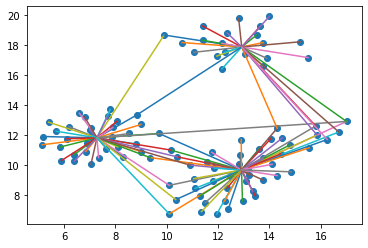

In [ ]:
plt.scatter(x,y)
for i in new_0:
  plt.plot([centroids[0][0],df[i][0]],[centroids[0][1],df[i][1]])
for i in new_1:
  plt.plot([centroids[1][0],df[i][0]],[centroids[1][1],df[i][1]])
for i in new_2:
  plt.plot([centroids[2][0],df[i][0]],[centroids[2][1],df[i][1]])

AFTER REMOVING POINTS THAT BELONGS TO SAME CLUSTER : 

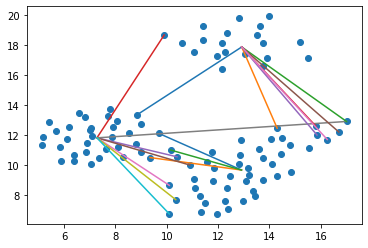

In [ ]:
new_00=np.array(None)
for i in new_0:
  if(clusters[i]-1!=0):
    new_00=np.append(new_00,i)
new_01=np.array(None)
for i in new_1:
  if(clusters[i]-1!=1):
    new_01=np.append(new_01,i)
new_02=np.array(None)
for i in new_2:
  if(clusters[i]-1!=2):
    new_02=np.append(new_02,i)
new_00=new_00[1:]
new_01=new_01[1:]
new_02=new_02[1:]
#------plotting-----
plt.scatter(x,y)
for i in new_00:
  plt.plot([centroids[0][0],df[i][0]],[centroids[0][1],df[i][1]])
for i in new_01:
  plt.plot([centroids[1][0],df[i][0]],[centroids[1][1],df[i][1]])
for i in new_02:
  plt.plot([centroids[2][0],df[i][0]],[centroids[2][1],df[i][1]])


NOW WE HAVE ALL THE REQUIRED EDGES WITH US AND WE NEED TO REMOVE ALL THE LONGEST EDGES AND LEAVING BEHIND ONLY THE N-1 SHORTEST EDGES : 

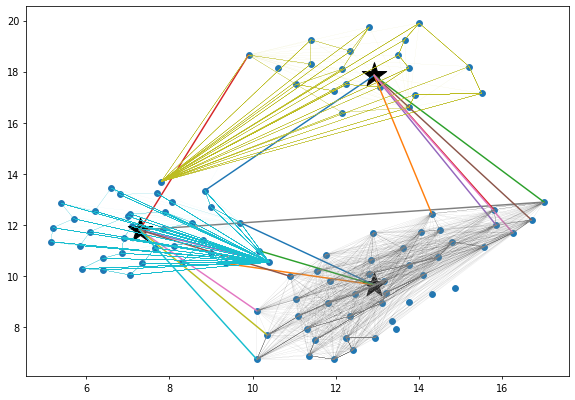

In [ ]:
figure(num=None, figsize=(10, 7), dpi=70, facecolor='w', edgecolor='k')
plt.scatter(x,y)
for i in new_00:
  plt.plot([centroids[0][0],df[i][0]],[centroids[0][1],df[i][1]])
for i in new_01:
  plt.plot([centroids[1][0],df[i][0]],[centroids[1][1],df[i][1]])
for i in new_02:
  plt.plot([centroids[2][0],df[i][0]],[centroids[2][1],df[i][1]])
plt.plot(x[new_a[:]],y[new_a[:]],lw=0.02)
# plt.plot(x[a[800:0]],y[a[800:0]],'go--')
plt.plot(x[new_c[:]],y[new_c[:]],lw=0.02)
plt.plot(x[new_b[:]],y[new_b[:]],lw=0.02)
# plt.scatter(centroids[:, 0], centroids[:, 1], marker = "*", s = 700, color = "black")

In [ ]:
class Graph: 
  
    def __init__(self, NoOfNode,vertices): 
        self.V= NoOfNode
        self.vertices =  vertices
        self.graph = []
    def addEdge(self,u,v,w): 
        self.graph.append([u,v,w]) 
    def find(self, parent, i): 
        if parent[i] == i: 
            return i 
        return self.find(parent, parent[i]) 

    def union(self, parent, rank, x, y): 
        xroot = self.find(parent, x) 
        yroot = self.find(parent, y) 
 
        if rank[xroot] < rank[yroot]: 
            parent[xroot] = yroot 
        elif rank[xroot] > rank[yroot]: 
            parent[yroot] = xroot 
        else : 
            parent[yroot] = xroot 
            rank[xroot] += 1

    def KruskalMST(self): 
        result =[] 
        i = 0
        e = 0 
        self.graph =  sorted(self.graph,key=lambda item: item[2]) 
        parent = {} ; rank = {} 
        for node in self.vertices: 
            parent[node] = node 
            rank[node] = 0 
        while e < self.V -1 : 
            u,v,w =  self.graph[i] 
            i = i + 1
            x = self.find(parent, u) 
            y = self.find(parent ,v) 
            if x != y: 
                e = e + 1     
                result.append([u,v]) 
                self.union(parent, rank, x, y)

        return result
#51 PROBABLE CENTERS ALIAS NAMES : 
vertices1 = ['A', 'B', 'C', 'D', 'E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','A1', 'B1', 'C1', 'D1', 'E1','F1','G1','H1','I1','J1','K1','L1','M1']
N = 39
g = Graph(N, vertices1)
for i in range(N):
  for j in range(N):
    g.addEdge(vertices1[i],vertices1[j],dist(x[new_a[i]],y[new_a[i]],x[new_a[j]],y[new_a[j]]))
MST1 = g.KruskalMST()
print(MST1)


[['F1', 'G1'], ['K', 'L'], ['X', 'G1'], ['W', 'X'], ['D1', 'I1'], ['C', 'G'], ['P', 'R'], ['L1', 'M1'], ['V', 'H1'], ['A1', 'D1'], ['L', 'T'], ['H', 'W'], ['K1', 'L1'], ['O', 'P'], ['I1', 'J1'], ['J1', 'K1'], ['F', 'A1'], ['J', 'V'], ['Q', 'R'], ['L', 'M'], ['B', 'C'], ['C', 'D'], ['T', 'U'], ['A', 'M1'], ['Y', 'Z'], ['Y', 'F1'], ['Z', 'E1'], ['U', 'V'], ['N', 'Q'], ['F', 'Z'], ['S', 'T'], ['G', 'Y'], ['H', 'J'], ['R', 'S'], ['I', 'J'], ['E', 'B1'], ['B1', 'C1'], ['B1', 'D1']]


In [ ]:
class Graph: 
  
    def __init__(self, NoOfNode,vertices): 
        self.V= NoOfNode
        self.vertices =  vertices
        self.graph = []
    def addEdge(self,u,v,w): 
        self.graph.append([u,v,w]) 
    def find(self, parent, i): 
        if parent[i] == i: 
            return i 
        return self.find(parent, parent[i]) 

    def union(self, parent, rank, x, y): 
        xroot = self.find(parent, x) 
        yroot = self.find(parent, y) 
 
        if rank[xroot] < rank[yroot]: 
            parent[xroot] = yroot 
        elif rank[xroot] > rank[yroot]: 
            parent[yroot] = xroot 
        else : 
            parent[yroot] = xroot 
            rank[xroot] += 1

    def KruskalMST(self): 
        result =[] 
        i = 0
        e = 0 
        self.graph =  sorted(self.graph,key=lambda item: item[2]) 
        parent = {} ; rank = {} 
        for node in self.vertices: 
            parent[node] = node 
            rank[node] = 0 
        while e < self.V -1 : 
            u,v,w =  self.graph[i] 
            i = i + 1
            x = self.find(parent, u) 
            y = self.find(parent ,v) 
            if x != y: 
                e = e + 1     
                result.append([u,v]) 
                self.union(parent, rank, x, y)

        return result
#51 PROBABLE CENTERS ALIAS NAMES : 
vertices2 = ['A', 'B', 'C', 'D', 'E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','A1', 'B1', 'C1', 'D1', 'E1','F1','G1','H1','I1','J1']
N = 36
g = Graph(N, vertices2)
for i in range(N):
  for j in range(N):
    g.addEdge(vertices2[i],vertices2[j],dist(x[new_b[i]],y[new_b[i]],x[new_b[j]],y[new_b[j]]))
MST2 = g.KruskalMST()
print(MST2)


[['B', 'J1'], ['P', 'Q'], ['G', 'H'], ['P', 'U'], ['E', 'R'], ['X', 'Z'], ['C1', 'D1'], ['U', 'V'], ['W', 'X'], ['E', 'F'], ['Y', 'Z'], ['G1', 'H1'], ['E1', 'G1'], ['A1', 'B1'], ['L', 'M'], ['I', 'K'], ['V', 'W'], ['N', 'O'], ['K', 'L'], ['K', 'O'], ['W', 'B1'], ['R', 'T'], ['B', 'C'], ['J', 'K'], ['B1', 'C1'], ['D1', 'F1'], ['T', 'D1'], ['D1', 'E1'], ['S', 'E1'], ['N', 'X'], ['C', 'S'], ['G', 'Q'], ['C', 'D'], ['H1', 'I1'], ['A', 'B']]


In [ ]:
class Graph: 
  
    def __init__(self, NoOfNode,vertices): 
        self.V= NoOfNode
        self.vertices =  vertices
        self.graph = []
    def addEdge(self,u,v,w): 
        self.graph.append([u,v,w]) 
    def find(self, parent, i): 
        if parent[i] == i: 
            return i 
        return self.find(parent, parent[i]) 

    def union(self, parent, rank, x, y): 
        xroot = self.find(parent, x) 
        yroot = self.find(parent, y) 
 
        if rank[xroot] < rank[yroot]: 
            parent[xroot] = yroot 
        elif rank[xroot] > rank[yroot]: 
            parent[yroot] = xroot 
        else : 
            parent[yroot] = xroot 
            rank[xroot] += 1

    def KruskalMST(self): 
        result =[] 
        i = 0
        e = 0 
        self.graph =  sorted(self.graph,key=lambda item: item[2]) 
        parent = {} ; rank = {} 
        for node in self.vertices: 
            parent[node] = node 
            rank[node] = 0 
        while e < self.V -1 : 
            u,v,w =  self.graph[i] 
            i = i + 1
            x = self.find(parent, u) 
            y = self.find(parent ,v) 
            if x != y: 
                e = e + 1     
                result.append([u,v]) 
                self.union(parent, rank, x, y)

        return result
#51 PROBABLE CENTERS ALIAS NAMES : 
vertices3 = ['A', 'B', 'C', 'D', 'E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T']
N = 20
g = Graph(N, vertices3)
for i in range(N):
  for j in range(N):
    g.addEdge(vertices3[i],vertices3[j],dist(x[new_c[i]],y[new_c[i]],x[new_c[j]],y[new_c[j]]))
MST3 = g.KruskalMST()
print(MST3)


[['A', 'B'], ['A', 'C'], ['J', 'K'], ['S', 'T'], ['M', 'N'], ['H', 'K'], ['N', 'O'], ['F', 'H'], ['O', 'P'], ['D', 'H'], ['K', 'L'], ['D', 'I'], ['L', 'S'], ['D', 'E'], ['G', 'O'], ['L', 'M'], ['Q', 'R'], ['M', 'Q'], ['A', 'D']]


In [ ]:
#indexing and minimum spanning tree partition wise .
#for partition : 1
indexing1=[]
for i in MST1:
  a=vertices1.index(i[0])
  b=vertices1.index(i[1])
  indexing1.append([a,b])
print(indexing1)
#for partition : 2
indexing2=[]
for i in MST2:
  a=vertices2.index(i[0])
  b=vertices2.index(i[1])
  indexing2.append([a,b])
print(indexing2)
#for partition : 3
indexing3=[]
for i in MST3:
  a=vertices3.index(i[0])
  b=vertices3.index(i[1])
  indexing3.append([a,b])
print(indexing3)


[[31, 32], [10, 11], [23, 32], [22, 23], [29, 34], [2, 6], [15, 17], [37, 38], [21, 33], [26, 29], [11, 19], [7, 22], [36, 37], [14, 15], [34, 35], [35, 36], [5, 26], [9, 21], [16, 17], [11, 12], [1, 2], [2, 3], [19, 20], [0, 38], [24, 25], [24, 31], [25, 30], [20, 21], [13, 16], [5, 25], [18, 19], [6, 24], [7, 9], [17, 18], [8, 9], [4, 27], [27, 28], [27, 29]]
[[1, 35], [15, 16], [6, 7], [15, 20], [4, 17], [23, 25], [28, 29], [20, 21], [22, 23], [4, 5], [24, 25], [32, 33], [30, 32], [26, 27], [11, 12], [8, 10], [21, 22], [13, 14], [10, 11], [10, 14], [22, 27], [17, 19], [1, 2], [9, 10], [27, 28], [29, 31], [19, 29], [29, 30], [18, 30], [13, 23], [2, 18], [6, 16], [2, 3], [33, 34], [0, 1]]
[[0, 1], [0, 2], [9, 10], [18, 19], [12, 13], [7, 10], [13, 14], [5, 7], [14, 15], [3, 7], [10, 11], [3, 8], [11, 18], [3, 4], [6, 14], [11, 12], [16, 17], [12, 16], [0, 3]]


NOW WE HAVE THE MST WITHIN PARTITIONS WITH US :

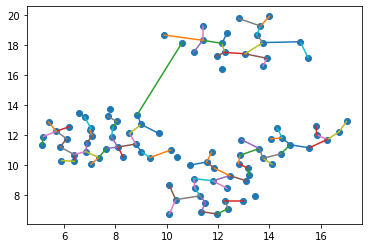

In [ ]:
plt.scatter(x[:96],y[:96])
for i in range(38):
  plt.plot([x[new_a[indexing1[i][0]]],x[new_a[indexing1[i][1]]]],[y[new_a[indexing1[i][0]]],y[new_a[indexing1[i][1]]]])
for i in range(35):
  plt.plot([x[new_b[indexing2[i][0]]],x[new_b[indexing2[i][1]]]],[y[new_b[indexing2[i][0]]],y[new_b[indexing2[i][1]]]])
for i in range(19):
  plt.plot([x[new_c[indexing3[i][0]]],x[new_c[indexing3[i][1]]]],[y[new_c[indexing3[i][0]]],y[new_c[indexing3[i][1]]]])


In [ ]:
new_00

array([23, 53, 54], dtype=object)

In [ ]:
new_01

array([0, 55, 56, 59, 68, 82, 83], dtype=object)

In [ ]:
new_02

array([21, 67, 68, 69, 70, 71, 72], dtype=object)

In [ ]:
for i in range(len(new_00)):
  print(dist(centroids[0][0],centroids[0][1],df[new_00[i]][0],df[new_00[i]][1]))
#last one to be added as an edge in this with a distance of 3.06

4.027596777542304
3.6568098152202797
3.0652228888002093


In [ ]:
for i in range(len(new_01)):
  print(dist(centroids[1][0],centroids[1][1],df[new_01[i]][0],df[new_01[i]][1]))
#second one to be added as an edge in this with a distance of 3.36

7.323500029470943
3.362746562910558
4.045310251958688
4.23398085235768
9.778554252541435
5.128837705667108
5.791865977833939


In [ ]:
for i in range(len(new_02)):
  print(dist(centroids[2][0],centroids[2][1],df[new_02[i]][0],df[new_02[i]][1]))
#second one to be added as an edge in this with a distance of 5.57

6.070422418964863
5.578394099167213
6.4190215662888
5.992696329454059
6.547420776218806
6.80234761729919
6.99830964365544


FINAL MST :

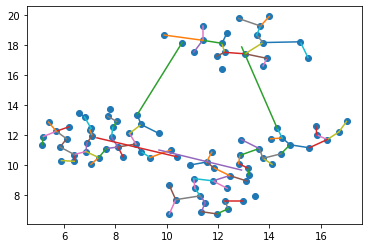

In [ ]:
plt.scatter(x[:96],y[:96])
for i in range(38):
  plt.plot([x[new_a[indexing1[i][0]]],x[new_a[indexing1[i][1]]]],[y[new_a[indexing1[i][0]]],y[new_a[indexing1[i][1]]]])
for i in range(35):
  plt.plot([x[new_b[indexing2[i][0]]],x[new_b[indexing2[i][1]]]],[y[new_b[indexing2[i][0]]],y[new_b[indexing2[i][1]]]])
for i in range(19):
  plt.plot([x[new_c[indexing3[i][0]]],x[new_c[indexing3[i][1]]]],[y[new_c[indexing3[i][0]]],y[new_c[indexing3[i][1]]]])

plt.plot([centroids[2][0],df[new_02[1]][0]],[centroids[2][1],df[new_02[1]][1]])
plt.plot([centroids[1][0],df[new_01[1]][0]],[centroids[1][1],df[new_01[1]][1]])
plt.plot([centroids[0][0],df[new_00[0]][0]],[centroids[0][1],df[new_00[2]][1]])